In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
import os
os.getcwd()

'C:\\Users\\zzuge\\zzugest'

In [2]:
x1=pd.read_csv('C:\\Users\\zzuge\\X1_10.csv')
x2=pd.read_csv('C:\\Users\\zzuge\\X2_10.csv')
x3=pd.read_csv('C:\\Users\\zzuge\\X3_10.csv')
y=pd.read_csv('C:\\Users\\zzuge\\Y_10.csv')

In [3]:
x1=np.array(x1).flatten()
x2=np.array(x2).flatten()
x3=np.array(x3).flatten()
y=np.array(y).flatten()

In [5]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [4]:
df=pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'y':y})
df

,x1,x2,x3,y
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
2495,0.0,0.0,0.0,0.0
2496,0.0,0.0,0.0,0.0
2497,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0


In [5]:
df=df[~(df['y']==0)]

In [6]:
df

,x1,x2,x3,y
511,240.19,535.88,240.19,2.0
513,1341.09,504.12,379.91,3.0
519,0.00,11.49,11.49,2.0
564,210.13,653.01,183.57,1.0
572,0.00,4.53,0.00,2.0
...,...,...,...,...
1725,2187.29,3399.05,1096.06,2.0
1756,454.86,311.29,177.81,2.0
1878,0.00,0.00,652.40,2.0
2112,0.00,0.00,478.78,1.0


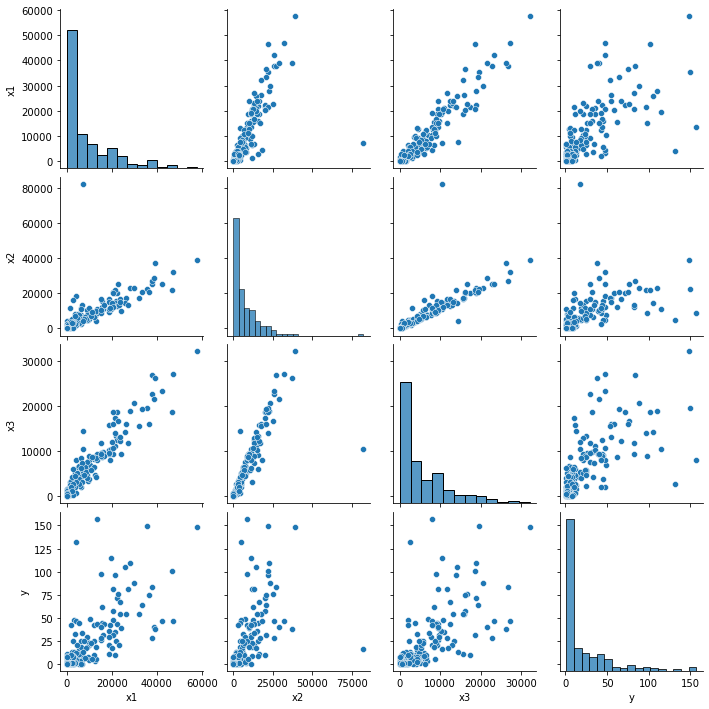

In [7]:
sns.pairplot(df)
plt.show()

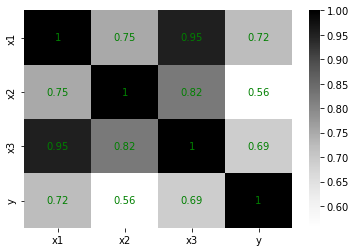

In [8]:
ax = sns.heatmap(df.corr(), annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

In [11]:
logdf=np.log1p(df)

In [12]:
logdf

,x1,x2,x3,y
511,5.485585,6.285775,5.485585,1.098612
513,7.201983,6.224796,5.942563,1.386294
519,0.000000,2.524928,2.524928,1.098612
564,5.352474,6.483123,5.218029,0.693147
572,0.000000,1.710188,0.000000,1.098612
...,...,...,...,...
1725,7.690876,8.131545,7.000389,1.098612
1756,6.122186,5.743932,5.186324,1.098612
1878,0.000000,0.000000,6.482189,1.098612
2112,0.000000,0.000000,6.173328,0.693147


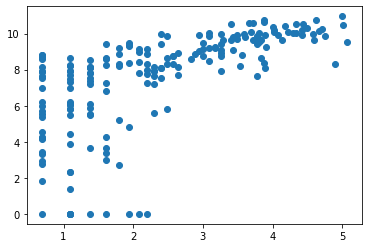

In [13]:
plt.scatter(logdf['y'],logdf['x1'])
plt.show()

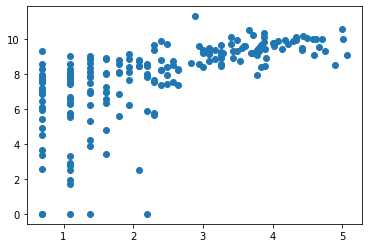

In [14]:
plt.scatter(logdf['y'],logdf['x2'])
plt.show()

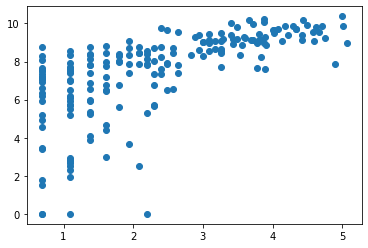

In [15]:
plt.scatter(logdf['y'],logdf['x3'])
plt.show()

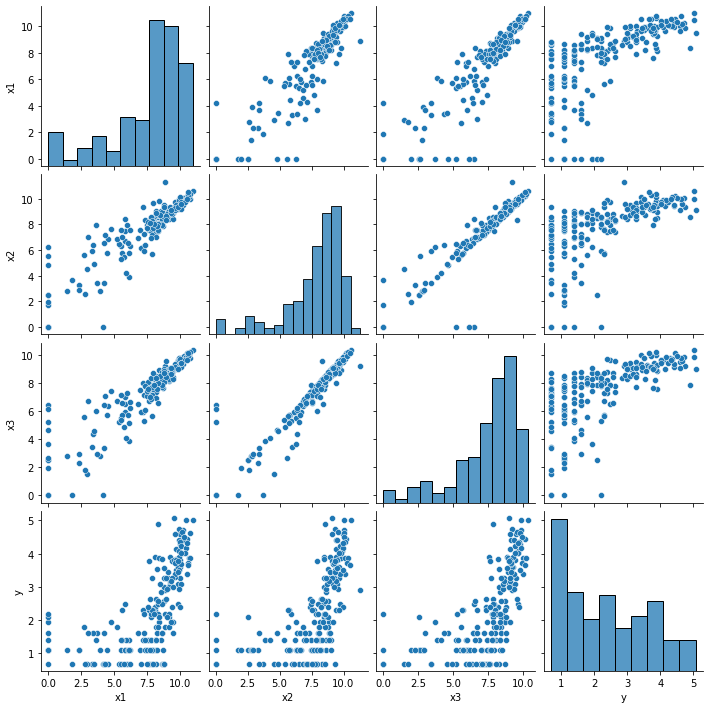

In [16]:
sns.pairplot(logdf)
plt.show()

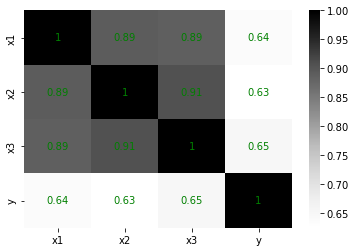

In [17]:
ax = sns.heatmap(logdf.corr(), annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()


In [18]:
from statsmodels.formula.api import ols  # 더빈왓슨값이 1.5~2.5 사이이면 잔차는 독립


model = ols('y ~ 0+x1+x2+x3',data=df)
res=model.fit()

In [19]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.673
Method:                 Least Squares   F-statistic:                              133.2
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                    1.71e-46
Time:                        21:12:16   Log-Likelihood:                         -867.16
No. Observations:                 193   AIC:                                      1740.
Df Residuals:                     190   BIC:                                      1750.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0019      0.000      4.089      0.000       0.001       0.003
x2             0.0002      0.000      0.521      0.603      -0.000       0.001
x3             0.0003      0.001      0.296      0.767      -0.002       0.002
==============================================================================
Omnibus:                      120.955   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1177.392
Skew:                           2.207   Prob(JB):                    2.15e-256
Kurtosis:                      14.266   Cond. No.                         13.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,x1,18.299830
1,x2,5.260067
2,x3,25.891192


In [21]:
fitted=res.predict(df)

In [22]:
residual=df['y']-fitted

In [24]:
residual

511     1.391359
513     0.249602
519     1.995083
564     0.446230
572     1.999298
          ...   
1725   -3.015256
1756    1.032036
1878    1.821958
2112    0.869340
2209    8.000000
Length: 193, dtype: float64

In [25]:
df['residual']=residual

C:\Users\zzuge\AppData\Local\Temp\ipykernel_12644\1869293449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residual']=residual


In [26]:
df

,x1,x2,x3,y,residual
511,240.19,535.88,240.19,2.0,1.391359
513,1341.09,504.12,379.91,3.0,0.249602
519,0.00,11.49,11.49,2.0,1.995083
564,210.13,653.01,183.57,1.0,0.446230
572,0.00,4.53,0.00,2.0,1.999298
...,...,...,...,...,...
1725,2187.29,3399.05,1096.06,2.0,-3.015256
1756,454.86,311.29,177.81,2.0,1.032036
1878,0.00,0.00,652.40,2.0,1.821958
2112,0.00,0.00,478.78,1.0,0.869340


In [27]:
df['residual'].min()

-55.75581446409063

C:\Users\zzuge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


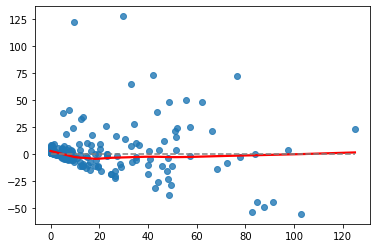

In [23]:
#모형의 선형성, 빨간 실선이 점선에서 크게 벗어나면 예측값에 따라 잔차가 크게 달라진다는 뜻 = 선형성이 없다.
sns.regplot(fitted,residual,lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()],[0,0],'--',color='grey')

C:\Users\zzuge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


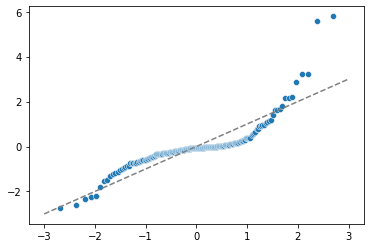

In [50]:
#잔차의 정규성, 잔차가 정규분포를 띄면 점들이 점선을 따라 배치되어 있어야 한다.
import scipy.stats
sr= scipy.stats.zscore(residual)
(x,y),_=scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3],[-3,3],'--',color='grey')

In [51]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.7621268033981323, pvalue=2.2155437137191808e-16)

C:\Users\zzuge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

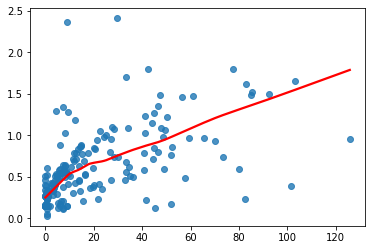

In [52]:
#잔차의 등분산성 , 빨간 실선이 수평선에 가까울수록 등분산성이 있다.
sns.regplot(fitted,np.sqrt(np.abs(sr)),lowess=True,line_kws={'color':'red'})

In [26]:
logmodel = ols('y ~ x1+x2+x3',data=logdf)
logres=logmodel.fit()

In [27]:
logres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     49.61
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.08e-23
Time:                        10:57:04   Log-Likelihood:                -262.07
No. Observations:                 193   AIC:                             532.1
Df Residuals:                     189   BIC:                             545.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3219      0.257     -1.252      0.212      -0.829       0.185
x1             0.1200      0.060      2.004      0.046       0.002       0.238
x2             0.0422      0.080      0.528      0.598      -0.115       0.200
x3             0.1937      0.080      2.432      0.016       0.037       0.351
==============================================================================
Omnibus:                        3.546   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.314
Skew:                          -0.000   Prob(JB):                        0.315
Kurtosis:                       2.464   Cond. No.                         52.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(logmodel.exog, i)} 
             for i, column in enumerate(logmodel.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,x1,5.893219
1,x2,7.071828
2,x3,6.785435


In [53]:
fitted=logres.predict(df)

In [54]:
residual=df['y']-fitted

C:\Users\zzuge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


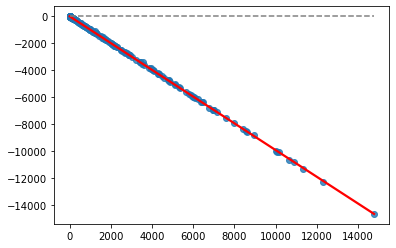

In [55]:
sns.regplot(fitted,residual,lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()],[0,0],'--',color='grey')

C:\Users\zzuge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


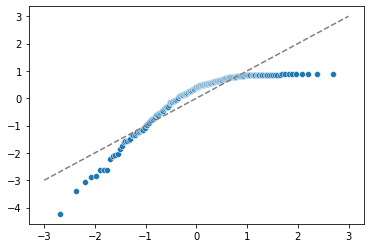

In [56]:
import scipy.stats
sr= scipy.stats.zscore(residual)
(x,y),_=scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3],[-3,3],'--',color='grey')

In [57]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.8123166561126709, pvalue=1.7028774088522977e-14)

C:\Users\zzuge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

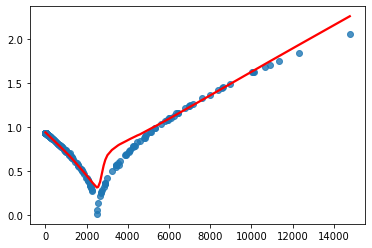

In [58]:
sns.regplot(fitted,np.sqrt(np.abs(sr)),lowess=True,line_kws={'color':'red'})